# Arraial do Cabo - Brazil

### This notebook ilustrate the maps for gravity anomalies in *Morro do Forno* (Rio de Janeiro - Brazil). It also shows the topography distribution, once the major master project is to extend all approaches that aim to estimate the magnetization direction through the cross correlation.

**All gravity data can be downloaded on [IGCEM](http://icgem.gfz-potsdam.de/ICGEM/) website.**

In [1]:
# Import all usefull libraris
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
from mpl_toolkits.basemap import Basemap

In [2]:
# Importing persoanl package functions
from plotting import statistical, plotting, drawstates

## Loading the data set

### Elevation/Bathymetry from Etopo1

In [3]:
# Setting longitude and latitude
xlong, ylat, topo = np.loadtxt('data/etopo1.gdf', skiprows=30, unpack=True)

In [4]:
# Setting minimun, maximun and central values for latitude and longitude
long_min = np.min(xlong)
long_max = np.max(xlong)

lat_min = np.min(ylat)
lat_max = np.max(ylat)

long0 = 0.5*(long_max + long_min)
lat0 = 0.5*(lat_max + lat_min)

In [5]:
# Setting the area - minimum and maximun corners in x and y axis
area = [long_min, long_max, lat_min, lat_max]
print 'Corners for longitude (degrees):', area[:2]
print 'Corners for latitude (degrees) :', area[2:]

Corners for longitude (degrees): [317.0, 319.0]
Corners for latitude (degrees) : [-24.0, -22.0]


#### Loading the gravity distribution

In [6]:
height, grav = np.loadtxt('data/grav.dat', usecols=(2,3), unpack=True)

#### Loading the gravity disturbance

In [7]:
_, deltag = np.loadtxt('data/disturbance.gdf', skiprows = 35, usecols=(2,3), unpack=True)

#### Loading the freeair anomaly

In [8]:
data = np.loadtxt('data/freeair.dat')
freeair = data[:,2]

#### Loading the Bouguer anomaly

In [9]:
data = np.loadtxt('data/bouguer.dat')
bouguer = data[:,2]

### Statistical analysis

In [10]:
print 'Topography and bathymetry:'
_ = statistical(topo, 'm')

Topography and bathymetry:
Minimum:    -2370.6975 m
Maximum:    1493.9020 m
Mean value: -101.1690 m
Variation:  3864.5995 m


In [11]:
print 'Gravity distribution:'
_ = statistical(grav, 'mGal')

Gravity distribution:
Minimum:    978287.0948 mGal
Maximum:    978916.0597 mGal
Mean value: 978803.0198 mGal
Variation:  628.9649 mGal


In [12]:
print 'Simple gravity disturbance:'
_ = statistical(deltag, 'mGal')

Simple gravity disturbance:
Minimum:    -69.7206 mGal
Maximum:    93.5399 mGal
Mean value: 11.8911 mGal
Variation:  163.2605 mGal


In [13]:
print 'Simple freeair anomaly:'
_ = statistical(freeair, 'mGal')

Simple freeair anomaly:
Minimum:    -68.9319 mGal
Maximum:    109.8478 mGal
Mean value: 13.9654 mGal
Variation:  178.7797 mGal


In [14]:
print 'Simple Bouguer anomaly:'
_ = statistical(bouguer, 'mGal')

Simple Bouguer anomaly:
Minimum:    -68.9078 mGal
Maximum:    135.9558 mGal
Mean value: 16.3643 mGal
Variation:  204.8635 mGal


### Setting the basemap and projections

In [15]:
m = Basemap(llcrnrlon=long_min,llcrnrlat=lat_min,
            urcrnrlon=long_max,urcrnrlat=lat_max,
            resolution='f',projection='merc',
            lon_0=long0,lat_0=lat0)
x, y = m(xlong, ylat)

### Drawing maps

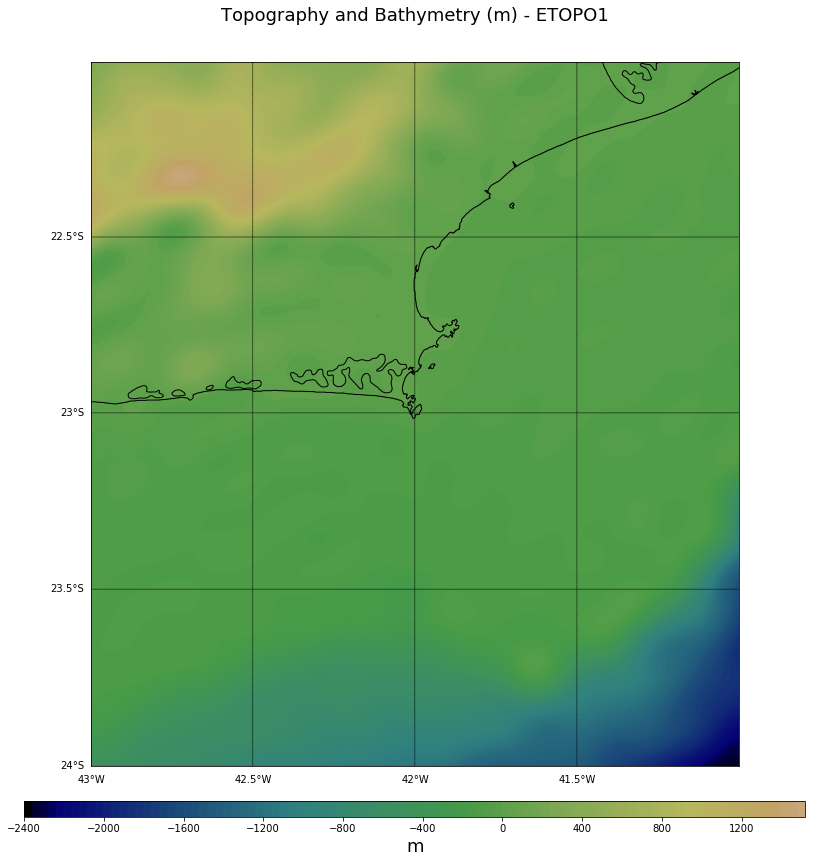

In [26]:
plotting(m, x, y, topo, area, 'm', 'Topography and Bathymetry (m) - ETOPO1', 'gist_earth',
         (20, 16), 0.5, axis = True)

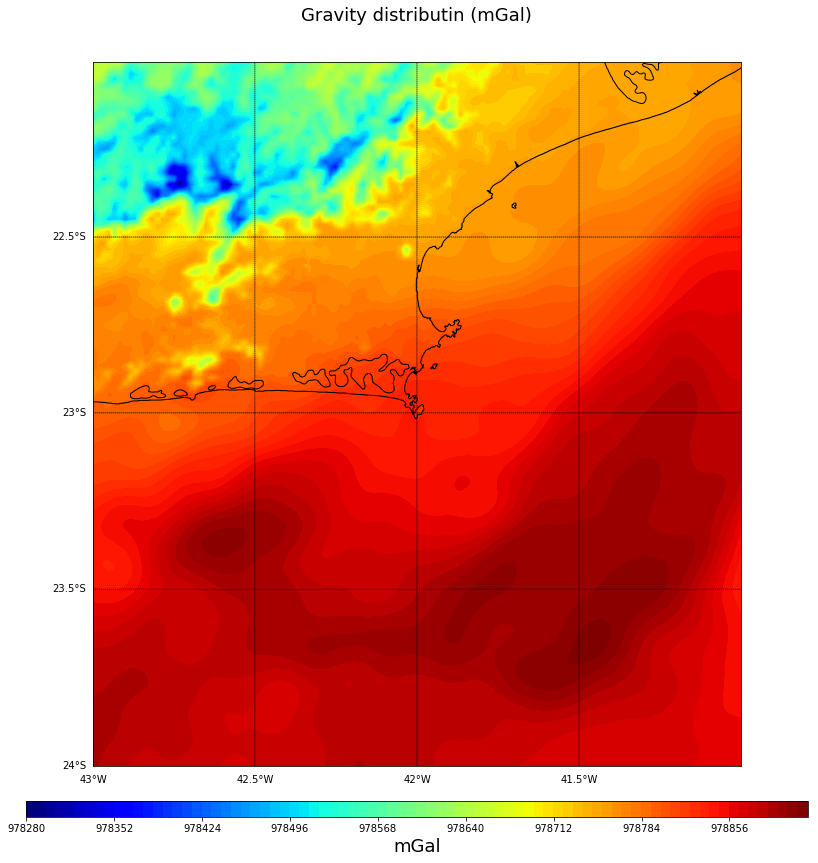

In [27]:
plotting(m, x, y, grav, area, 'mGal', 'Gravity distributin (mGal)', 'jet',
         (20, 16), 0.5, axis = True)

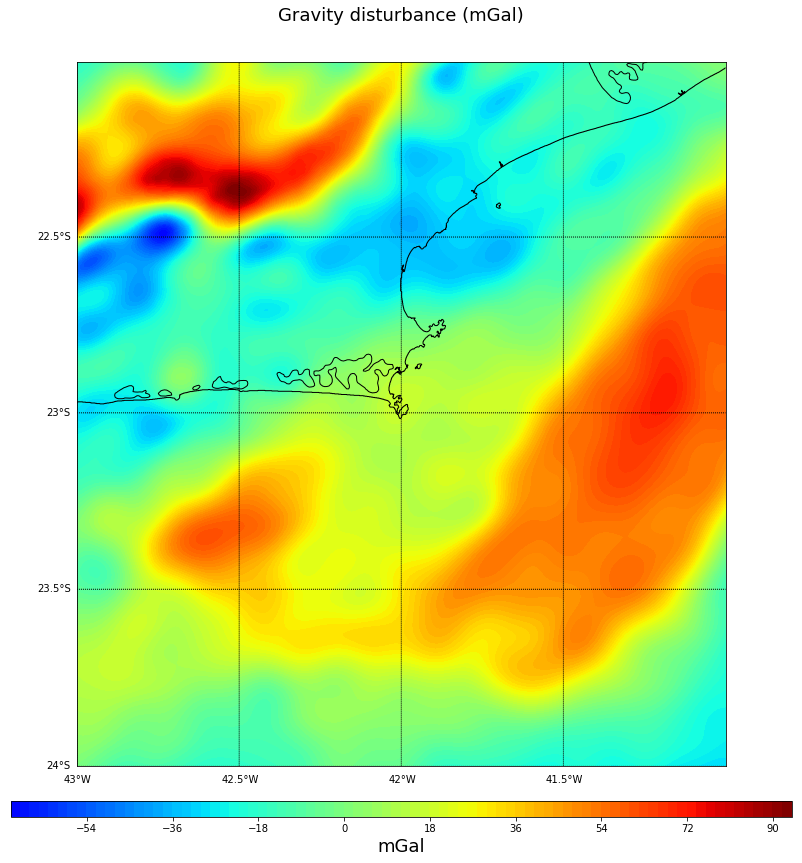

In [28]:
plotting(m, x, y, deltag, area, 'mGal', 'Gravity disturbance (mGal)', 'jet',
         (20, 16), 0.5, axis = True)

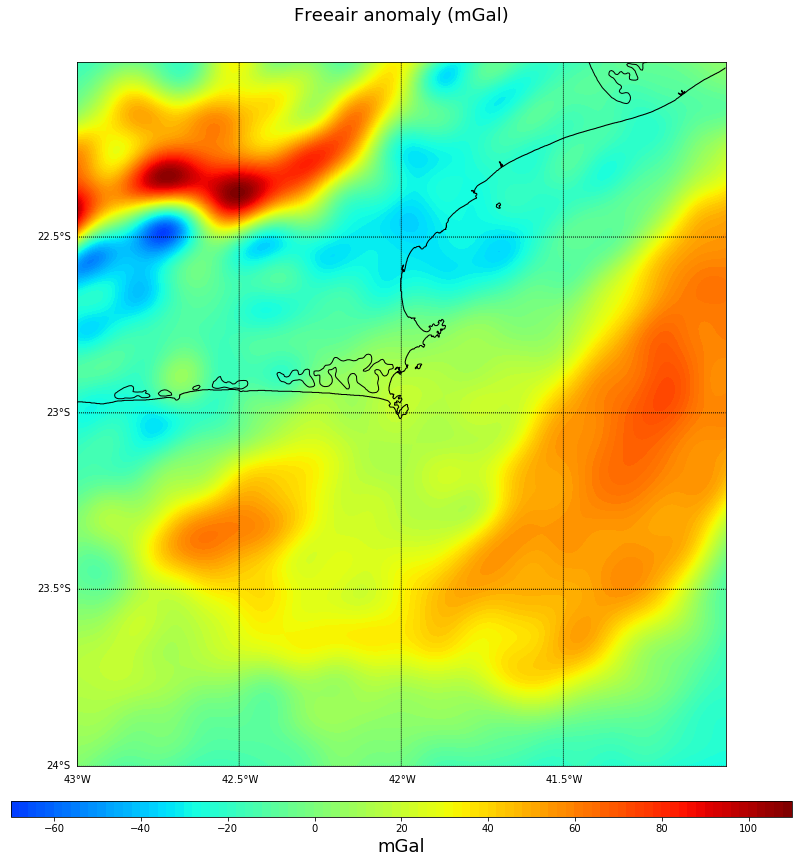

In [29]:
plotting(m, x, y, freeair, area, 'mGal', 'Freeair anomaly (mGal)', 'jet',
         (20, 16), 0.5, axis = True)

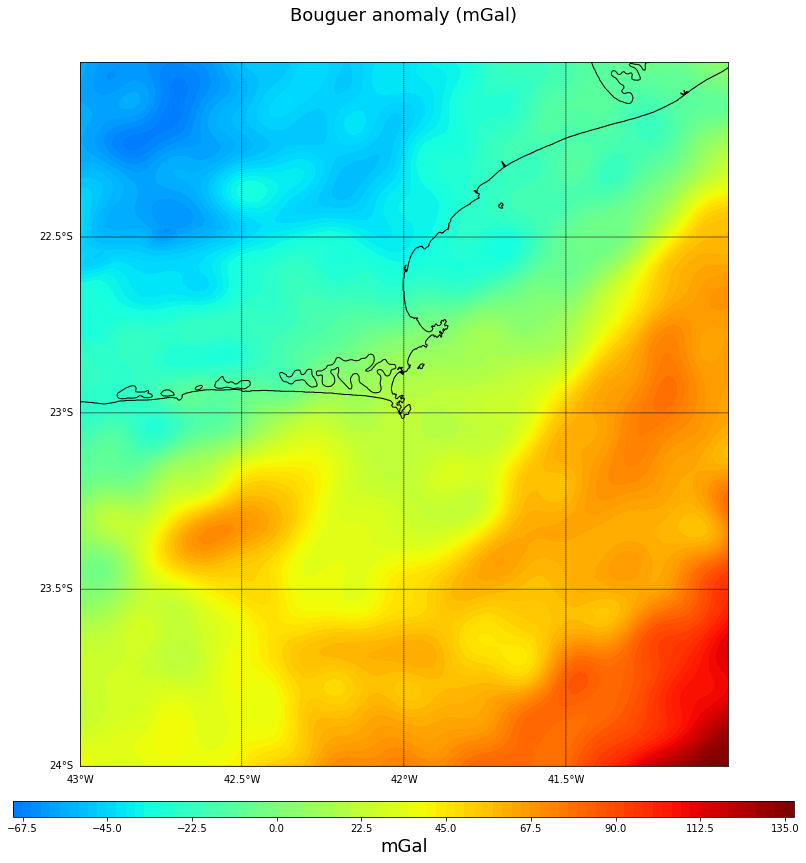

In [30]:
plotting(m, x, y, bouguer, area, 'mGal', 'Bouguer anomaly (mGal)', 'jet',
         (20, 16), 0.5, axis = True)